# Классификация изображений

В данном проекте мы сделаем бинарную классификацию изображений. Рассмотрим набор изображений состоящий из двух классов: коты и собаки. В обучающей выборке 4000 изображений каждого класса, в тестовой - 1000 изображений каждого класса. Так же модель можно протестировать на отдельно добавленных изображениях.

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


# Подготовка данных

Воспользуемся инструментом ImageDataGenerator из библиотеки keras, который позволяет преообразовать изображения в батчи тензоров. Генератор позволяет добавить различные преобразования с изображениями. Масштабируем изображения, добавляем рандомное отражение по горизонтали, поворот, zoom.

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('CNN_Data/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('CNN_Data/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# Модель

Для обучения модели будем использовать сверточную нейронную сеть. Пробуя несколько архитектур сетей, добавляя и убирая слои, мы измеряли качество на тестовой выборке.
Сеть, которая дала лучшее качество, состоит из семи слоев:
1. Сверточный слой с ядром свертки - (3,3).
2. Слой MaxPooling
3. Сверточный слой с ядром свертки - (3,3).
4. Слой MaxPooling
5. Распремляющий слой.
6. Простой слой с активацией relu
7. Простой слой с активацией sigmoid

In [2]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Обучаем модель на 10 эпохах. При большем количестве эпох, качество продолжает расти, но мощности компьютеров нам не хватило.

In [4]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/10
 251/8000 [..............................] - ETA: 50:27 - loss: 0.4380 - acc: 0.7971 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00

Оценим качество на тестовой выборке.

In [12]:
classifier.evaluate_generator(test_set,steps=2000)

[0.46366301662133463, 0.7825012358178965]

# Предсказания

Также можно построить предсказание на любом другом изображении. Проверим модель на изображении "кот похожий на собаку" и на собаке корги.

In [41]:
from keras.preprocessing import image
from IPython.display import display
def get_prediction(url):
    raw_test_image = image.load_img(url, target_size = (64, 64))
    test_image = image.img_to_array(raw_test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    if result[0][0] == 1:
        print('ПЕС')
    else:
        print('КОТ')
    display(raw_test_image)

Как видим, модель блестяще справилась с такими непростыми случаями ;]

КОТ


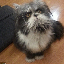

In [39]:
get_prediction('CNN_Data/for_prediction/cat_like_dog.jpg')

ПЕС


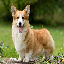

In [40]:
get_prediction('CNN_Data/for_prediction/corgi.jpg')